## Introduction to Convolutional Neural Networks

### Understanding convolutions

In [15]:
import matplotlib.pyplot as plt

In [16]:
import numpy as np

array_1 = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])

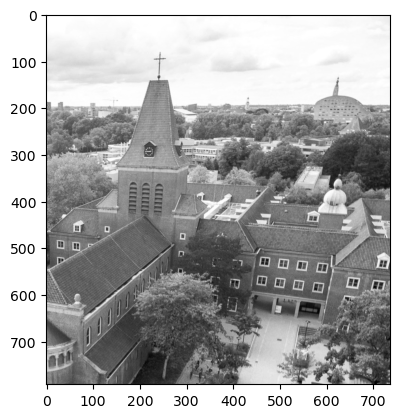

In [17]:
import skimage as ski

buas_img = ski.io.imread("BUas_1.png", as_gray=True)

plt.imshow(buas_img, cmap="gray") 
plt.show()

Notice that we are loading the image in grayscale by using the parameter 'as_gray=True' in the imread function. This is needed to use the function convolve2d and the 3x3 array previously defined (both inputs must have the same number of dimensions).

Now we can convolve the array over BUas image using the function convolve2d:

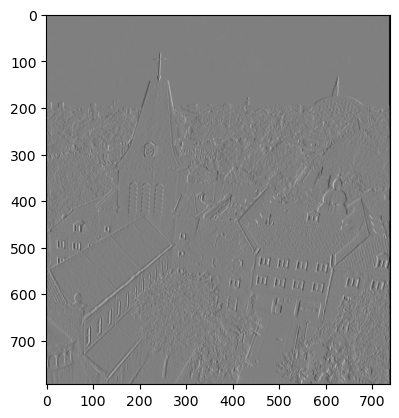

In [18]:
from scipy.signal import convolve2d

conv_output_1 = convolve2d(buas_img, array_1)

plt.imshow(conv_output_1, cmap="gray") 
plt.show()

As you can see, the output of the convolution operation emphasizes the edges. Notice that the edges are either white or black (windows), and the smooth surfaces are gray (sky).

To better visualize the edges, we can take the absolute value of the output to set all edges to white and the rest to black.

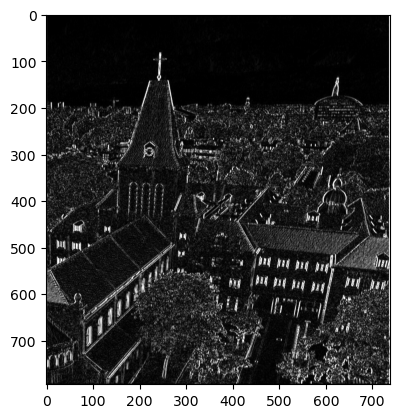

In [19]:
abs_conv_1 = np.absolute(conv_output_1)
clipped_result_1 = np.clip(abs_conv_1, 0, 1.0)

plt.imshow(clipped_result_1, cmap="gray") 
plt.show()

The 3x3 array that we created (array_1) is called a kernel (or a filter). The numbers in the array are not random. They were selected for edge detection. And if you look at the output carefully, you will notice that the kernel is not designed to detect all the edges. It is a special kernel designed to detect vertical edges.

We can design another kernel for horizontal edges:

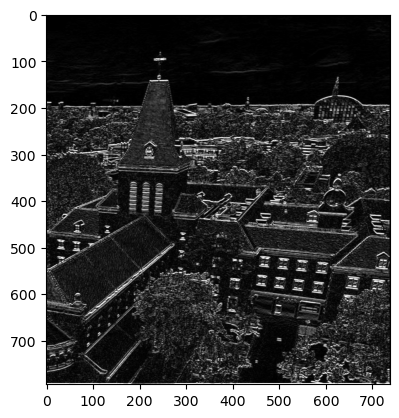

In [20]:
array_2 = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])

conv_output_2 = convolve2d(buas_img, array_2)

abs_conv_2 = np.absolute(conv_output_2)
clipped_result_2 = np.clip(abs_conv_2, 0, 1.0)

plt.imshow(clipped_result_2, cmap="gray") 
plt.show()

**In summary, convolution is an operation of a kernel on an image in order to extract useful features.**

#### Implementing a sharpening filter

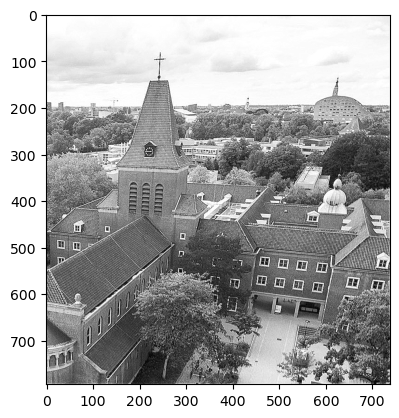

In [23]:
sharp_array = np.array(
    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]]
)
conv_output_3 = convolve2d(buas_img, sharp_array)
abs_conv_3 = np.absolute(conv_output_3)
clipped_result_3 = np.clip(abs_conv_3, 0, 1.0)

plt.imshow(clipped_result_3, cmap="gray") 
plt.show()

#### Implement a Gaussian blur filter

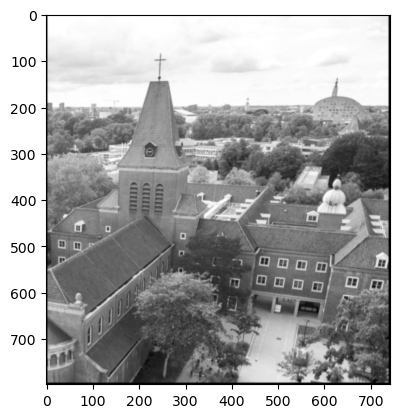

In [24]:
sigma = 0.84089642
gauss_array = np.array([[0.00000067, 0.00002292, 0.00019117, 0.00038771, 0.00019117, 0.00002292, 0.00000067],
                        [0.00002292, 0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633, 0.00002292],
                        [0.00019117, 0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965, 0.00019117],
                        [0.00038771, 0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373, 0.00038771],
                        [0.00019117, 0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965, 0.00019117],
                        [0.00002292, 0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633, 0.00002292],
                        [0.00000067, 0.00002292, 0.00019117, 0.00038771, 0.00019117, 0.00002292, 0.00000067]])
conv_output_4 = convolve2d(buas_img, gauss_array)
abs_conv_4 = np.absolute(conv_output_4)
clipped_result_4 = np.clip(abs_conv_4, 0, 1.0)

plt.imshow(clipped_result_4, cmap="gray") 
plt.show()